In [161]:
import nibabel as nib
mr_img_normal = nib.load('../data/IXI254-HH-1705-T1.nii')
mr_img_defaced = nib.load('../data/IXI254-HH-1705-T1_defaced.nii')
norm_data = mr_img_normal.get_data()
def_data = mr_img_defaced.get_data()
print(mr_img_normal.shape)
print(mr_img_defaced.shape)

(256, 256, 150)
(256, 256, 150)


In [162]:
import numpy as np
print(np.max(norm_data))
print(np.min(norm_data))
norm_data2 = (norm_data - np.min(norm_data))/(np.max(norm_data)-np.min(norm_data))
print(np.max(norm_data2))
print(np.min(norm_data2))

1834
0
1.0
0.0


In [163]:
import matplotlib.pyplot as plt
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
      axes[i].imshow(slice.T, cmap="gray", origin="lower")

def show_slice(slice):
    plt.imshow(slice.T, cmap="gray", origin="lower")


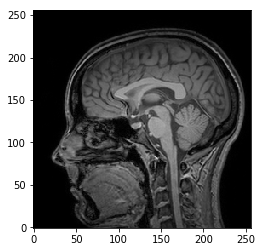

In [164]:
#norm_arr = [#norm_data2[127, :, :],
            #norm_data2[:, 127, :],
            #norm_data2[:, :, 74]]
norm = norm_data2[:, :, 74]
show_slice(norm)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


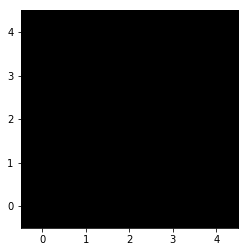

In [209]:
show_slice(norm[0:5,0:5])
print(norm[0:5, 0:5])

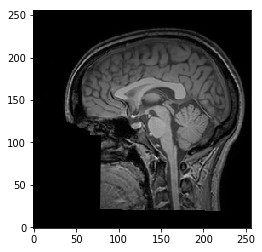

In [165]:
def_arr = [#def_data[127, :, :],
            #def_data[:, 127, :],
            def_data[:, :, 74]]
#show_slices(def_arr)
def_slice = def_data[:, :, 74]
show_slice(def_slice)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


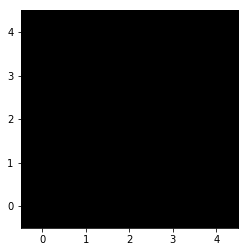

In [210]:
show_slice(def_slice[0:5,0:5])
print(def_slice[0:5, 0:5])

(256, 256, 150)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]]


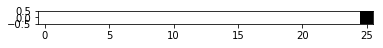

In [230]:
mr_mask = nib.load('../data/IXI254-HH-1705-T1_mask.nii')
mask_data = mr_mask.get_data()
print(mask_data.shape)
mask_arr = [#mask_data[127, :, :],
            #mask_data[:, 127, :],
            mask_data[:, :, 74]]
mask_slice = mask_data[:, :, 74]
show_slice(mask_slice)
#show_slices(mask_arr)
show_slice(mask_slice[2:28, 2:3])
print(mask_slice[2:28, 2:3])



(1, 256, 256, 1)
0.5


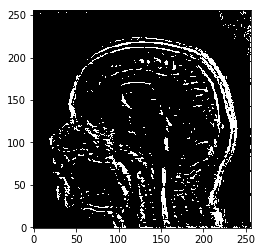

In [200]:
## a/IXI431-Guys-0986-T1_mask.nii
# IXI568-HH-2607-T1_mask
mr_mask = nib.load('../d_mask.nii')
mask_data = mr_mask.get_data()
print(mask_data.shape)
mask_data = mask_data[0, :, : ,: ]
mask_arr = [#mask_data[124, :, :],
            #mask_data[:, 124, :],
            mask_data[:, :, 0]]
pred_mask = mask_data[:, :, 0]
#show_slices(mask_arr)

#show_slice(pred_mask)
print(np.max(pred_mask))
pred_mask[pred_mask >= 0.5] = 1
pred_mask[pred_mask < 0.5] = 0
show_slice(pred_mask)


In [201]:
from scipy.spatial import distance
distance.jaccard(np.reshape(pred_mask, -1), np.reshape(mask_slice, -1))

print(np.sum(pred_mask == mask_slice))
print(np.prod(pred_mask.shape))
3991/54436

32063
65536


0.07331545300903813

19972
65536


0.30474853515625

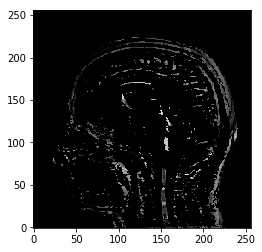

In [204]:
applied_mask = np.multiply(pred_mask, norm)
show_slice(applied_mask)
print(np.sum(applied_mask== def_slice))
print(np.prod(applied_mask.shape))
19972/65536